<a href="https://colab.research.google.com/github/MaDufie/ml_journey/blob/feature%2Fprediction-jan-2024/merge_flight_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight & Weather Data Jan 2024

In [1]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [4]:
flight_df = pd.read_csv('/content/drive/MyDrive/My ML Journey/flight_arrival_delay_prediction/data/jan_2024_data/flight_data.csv')
weather_df = pd.read_csv('/content/drive/MyDrive/My ML Journey/flight_arrival_delay_prediction/data/jan_2024_data/weather_data.csv')

# Merging Flight Data and Weather Data

In [5]:
# Create the 'IDENTITY' column by concatenating 'ORIGIN', 'DAY_OF_MONTH' and 'CRS_DEP_TIME_HH' with underscores
flight_df['IDENTITY'] = flight_df['ORIGIN'].astype(str) + '_' + \
                             flight_df['DAY_OF_MONTH'].astype(str) + '_' + \
                             flight_df['CRS_DEP_TIME_HH'].astype(str)
flight_df.head()

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK MKT_UNIQUE_CARRIER  \
0  2024        1      1             1            1                 AA   
1  2024        1      1             1            1                 AA   
2  2024        1      1             2            2                 AA   
3  2024        1      1             2            2                 AA   
4  2024        1      1             3            3                 AA   

   MKT_CARRIER_FL_NUM OP_UNIQUE_CARRIER  ORIGIN_AIRPORT_ID ORIGIN  ...  \
0                1002                AA              13485    MSN  ...   
1                1168                AA              13485    MSN  ...   
2                1002                AA              13485    MSN  ...   
3                1168                AA              13485    MSN  ...   
4                1002                AA              13485    MSN  ...   

  CARRIER_NUM In-Degree Centrality_ORIGIN  Out-Degree Centrality_ORIGIN  \
0      AA1002                        0.04                          0.04   
1      AA1168                        0.04                          0.04   
2      AA1002                        0.04                          0.04   
3      AA1168                        0.04                          0.04   
4      AA1002                        0.04                          0.04   

  Betweenness Centrality_ORIGIN Closeness Centrality_ORIGIN  \
0                  7.366142e-07                    0.471063   
1                  7.366142e-07                    0.471063   
2                  7.366142e-07                    0.471063   
3                  7.366142e-07                    0.471063   
4                  7.366142e-07                    0.471063   

  In-Degree Centrality_DEST  Out-Degree Centrality_DEST  \
0                  0.377143                    0.377143   
1                  0.377143                    0.377143   
2                  0.377143                    0.377143   
3                  0.377143                    0.377143   
4                  0.377143                    0.377143   

   Betweenness Centrality_DEST  Closeness Centrality_DEST  IDENTITY  
0                     0.083575                   0.590219   MSN_1_6  
1                     0.083575                   0.590219  MSN_1_16  
2                     0.083575                   0.590219   MSN_2_6  
3                     0.083575                   0.590219  MSN_2_16  
4                     0.083575                   0.590219   MSN_3_6  

[5 rows x 52 columns]

In [6]:
# Create the 'IDENTITY' column by concatenating 'AIRPORT', 'DAY_OF_MONTH', and 'TIME' with underscores
weather_df['IDENTITY'] = weather_df['AIRPORT'].astype(str) + '_' + \
                           weather_df['DAY_OF_MONTH'].astype(str) + '_' + \
                           weather_df['TIME'].astype(str)

weather_df.drop(columns=['AIRPORT', 'YEAR', 'MONTH', 'DAY_OF_MONTH', 'TIME'], inplace=True)

weather_df.tail(10)

weather_code  temperature_2m  relative_humidity_2m  dewpoint_2m  \
261134             1            24.0                    30          5.4   
261135             1            24.0                    30          5.2   
261136             2            23.1                    33          5.8   
261137             1            22.7                    35          6.2   
261138             1            19.0                    48          7.7   
261139             1            16.5                    58          8.1   
261140             1            15.5                    65          8.9   
261141             1            14.7                    73          9.9   
261142             0            15.0                    71          9.9   
261143             0            13.5                    75          9.1   

        surface_pressure  precipitation  rain  snowfall  cloudcover  \
261134            1007.5            0.0   0.0       0.0          30   
261135            1006.9            0.0   0.0       0.0          37   
261136            1006.4            0.0   0.0       0.0          59   
261137            1006.1            0.0   0.0       0.0          34   
261138            1005.3            0.0   0.0       0.0          24   
261139            1005.3            0.0   0.0       0.0          25   
261140            1005.2            0.0   0.0       0.0          24   
261141            1005.3            0.0   0.0       0.0          29   
261142            1005.4            0.0   0.0       0.0           3   
261143            1005.1            0.0   0.0       0.0           0   

        cloudcover_low  cloud_cover_mid  cloud_cover_high  wind_speed_10m  \
261134               0                0               100             9.4   
261135               0               12               100             9.4   
261136               0               50                97             7.2   
261137               0                7                98             6.1   
261138               0                0                79             8.1   
261139               0                0                84             9.2   
261140               0                7                67             8.8   
261141               0                0                96             8.7   
261142               0                0                 9             6.5   
261143               0                0                 0             7.1   

        wind_speed_100m  wind_direction_10m  wind_direction_100m  \
261134             11.9                 178                  177   
261135             12.3                 173                  173   
261136              9.8                 174                  174   
261137             10.1                 177                  174   
261138             10.5                 193                  186   
261139             11.5                 206                  200   
261140             12.6                 168                  183   
261141             16.7                 156                  174   
261142             17.7                 161                  178   
261143             17.7                 150                  167   

        wind_gusts_10m   IDENTITY  
261134            22.7  YUM_31_14  
261135            23.8  YUM_31_15  
261136            22.7  YUM_31_16  
261137            16.6  YUM_31_17  
261138            13.0  YUM_31_18  
261139            10.4  YUM_31_19  
261140            10.4  YUM_31_20  
261141            11.9  YUM_31_21  
261142            11.2  YUM_31_22  
261143            10.4  YUM_31_23

In [7]:
merged_df_origin = flight_df.merge(weather_df, on='IDENTITY', suffixes=('_ORIGIN', '_ORIGIN'))

In [8]:
#drop identity column
merged_df_origin.drop(columns=['IDENTITY'], inplace=True)

In [9]:
merged_df_origin['IDENTITY'] = merged_df_origin['DEST'].astype(str) + '_' + \
                             merged_df_origin['DAY_OF_MONTH'].astype(str) + '_' + \
                             merged_df_origin['CRS_ARR_TIME_HH'].astype(str)

In [10]:
merged_df_dest = merged_df_origin.merge(weather_df, on='IDENTITY', suffixes=('_ORIGIN', '_DEST'))

In [11]:
merged_df_dest.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'MKT_UNIQUE_CARRIER', 'MKT_CARRIER_FL_NUM', 'OP_UNIQUE_CARRIER',
       'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
       'DEST_AIRPORT_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'TAXI_OUT',
       'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'CRS_DEP_TIME_HH', 'DEP_TIME_HH',
       'CRS_ARR_TIME_HH', 'ARR_TIME_HH', 'CRS_DEP_TIME_OF_DAY',
       'CRS_ARR_TIME_OF_DAY', 'ARR_DELAY_CLASS', 'CARRIER_NUM',
       'In-Degree Centrality_ORIGIN', 'Out-Degree Centrality_ORIGIN',
       'Betweenness Centrality_ORIGIN', 'Closeness Centrality_ORIGIN',
       'In-Degree Centrality_DEST', 'Out-Degree Centrality_DEST',
       'Betweenn

In [12]:
merged_df_dest.drop(columns=['IDENTITY', 'CRS_DEP_TIME_HH', 'DEP_TIME_HH', 'CRS_ARR_TIME_HH', 'ARR_TIME_HH'], inplace=True)

In [13]:
#make copy of merged_df_dest
merged_df = merged_df_dest.copy()

In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551143 entries, 0 to 551142
Data columns (total 81 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   YEAR                           551143 non-null  int64  
 1   QUARTER                        551143 non-null  int64  
 2   MONTH                          551143 non-null  int64  
 3   DAY_OF_MONTH                   551143 non-null  int64  
 4   DAY_OF_WEEK                    551143 non-null  int64  
 5   MKT_UNIQUE_CARRIER             551143 non-null  object 
 6   MKT_CARRIER_FL_NUM             551143 non-null  int64  
 7   OP_UNIQUE_CARRIER              551143 non-null  object 
 8   ORIGIN_AIRPORT_ID              551143 non-null  int64  
 9   ORIGIN                         551143 non-null  object 
 10  ORIGIN_CITY_NAME               551143 non-null  object 
 11  ORIGIN_STATE_ABR               551143 non-null  object 
 12  DEST_AIRPORT_ID               

In [15]:
merged_df.head()

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK MKT_UNIQUE_CARRIER  \
0  2024        1      1             1            1                 AA   
1  2024        1      1             1            1                 AA   
2  2024        1      1             1            1                 AA   
3  2024        1      1             1            1                 AA   
4  2024        1      1             1            1                 AA   

   MKT_CARRIER_FL_NUM OP_UNIQUE_CARRIER  ORIGIN_AIRPORT_ID ORIGIN  ...  \
0                1002                AA              13485    MSN  ...   
1                2865                AA              10423    AUS  ...   
2                1675                AA              13303    MIA  ...   
3                1793                AA              10721    BOS  ...   
4                1928                AA              10693    BNA  ...   

  snowfall_DEST cloudcover_DEST  cloudcover_low_DEST cloud_cover_mid_DEST  \
0           0.0              88                    0                  100   
1           0.0              88                    0                  100   
2           0.0              88                    0                  100   
3           0.0              88                    0                  100   
4           0.0              88                    0                  100   

  cloud_cover_high_DEST wind_speed_10m_DEST  wind_speed_100m_DEST  \
0                    94                10.0                  21.8   
1                    94                10.0                  21.8   
2                    94                10.0                  21.8   
3                    94                10.0                  21.8   
4                    94                10.0                  21.8   

   wind_direction_10m_DEST  wind_direction_100m_DEST  wind_gusts_10m_DEST  
0                      244                       248                 20.5  
1                      244                       248                 20.5  
2                      244                       248                 20.5  
3                      244                       248                 20.5  
4                      244                       248                 20.5  

[5 rows x 81 columns]

In [16]:
# Function to convert time from "hhmm" format to total minutes
def convert_to_minutes(time_value):
    if pd.isna(time_value):
        return None
    hours = time_value // 100
    minutes = time_value % 100
    return hours * 60 + minutes

time_columns = ['CRS_DEP_TIME', 'DEP_TIME', 'CRS_ARR_TIME', 'ARR_TIME']
for col in time_columns:
    merged_df[col] = merged_df[col].apply(convert_to_minutes)
merged_df[time_columns] = merged_df[time_columns].astype(int)

In [17]:
merged_df[time_columns].head()

CRS_DEP_TIME  DEP_TIME  CRS_ARR_TIME  ARR_TIME
0           365       360           556       551
1           360       354           576       558
2           470       492           596       614
3           420       461           576       597
4           452       445           595       585

# Exploratory Data Analysis

## Arrival Delay Distribution

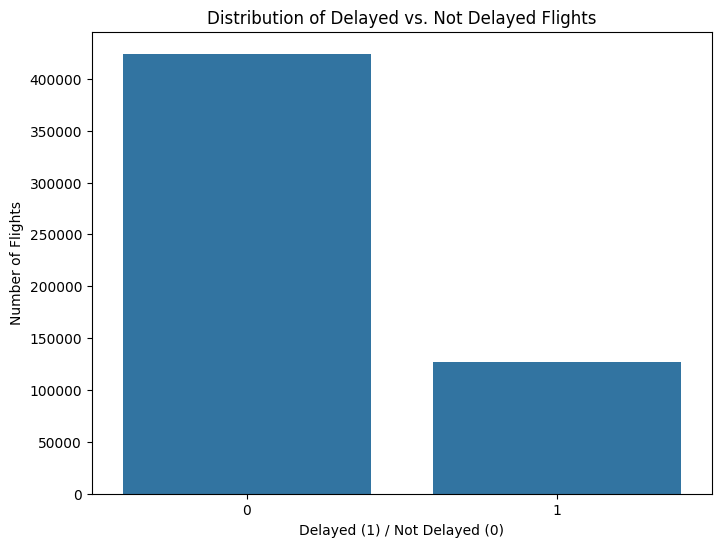

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x='ARR_DELAY_CLASS', data=merged_df)
plt.title('Distribution of Delayed vs. Not Delayed Flights')
plt.xlabel('Delayed (1) / Not Delayed (0)')
plt.ylabel('Number of Flights')
plt.show()

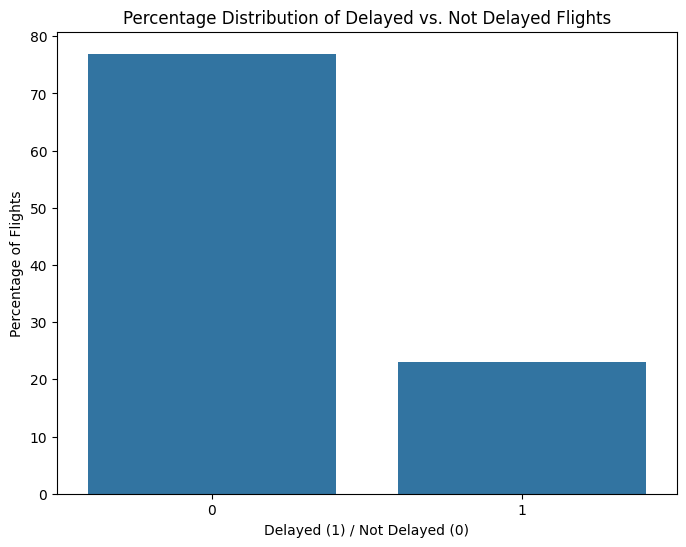

In [19]:
arr_delay_counts = merged_df['ARR_DELAY_CLASS'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=arr_delay_counts.index, y=arr_delay_counts.values)

plt.title('Percentage Distribution of Delayed vs. Not Delayed Flights')
plt.xlabel('Delayed (1) / Not Delayed (0)')
plt.ylabel('Percentage of Flights')
plt.show()


## Departure Delay vs Arrival Delay

<Axes: xlabel='DEP_DELAY_NEW', ylabel='ARR_DELAY_NEW'>

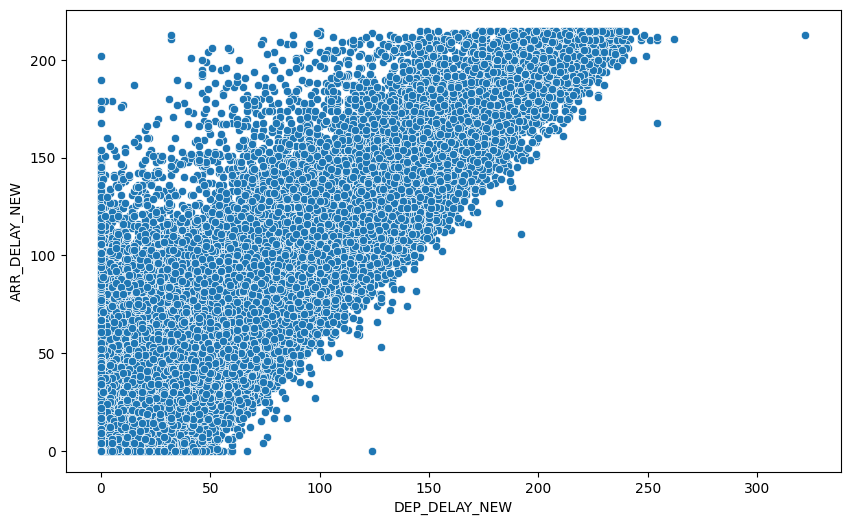

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='DEP_DELAY_NEW', y='ARR_DELAY_NEW', data=merged_df)

## Day of the Week vs Arrival Delay

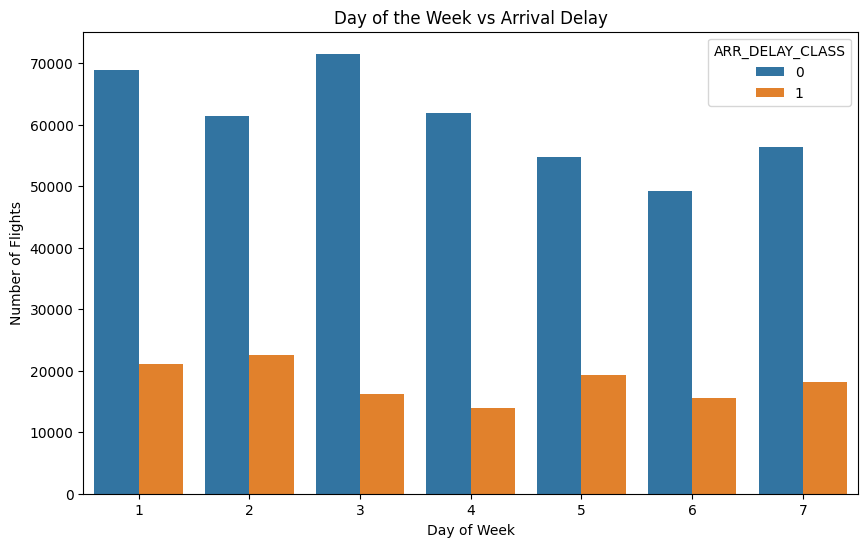

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(data=merged_df, x='DAY_OF_WEEK', hue='ARR_DELAY_CLASS')

plt.title('Day of the Week vs Arrival Delay')
plt.xlabel('Day of Week')
plt.ylabel('Number of Flights')
plt.show()

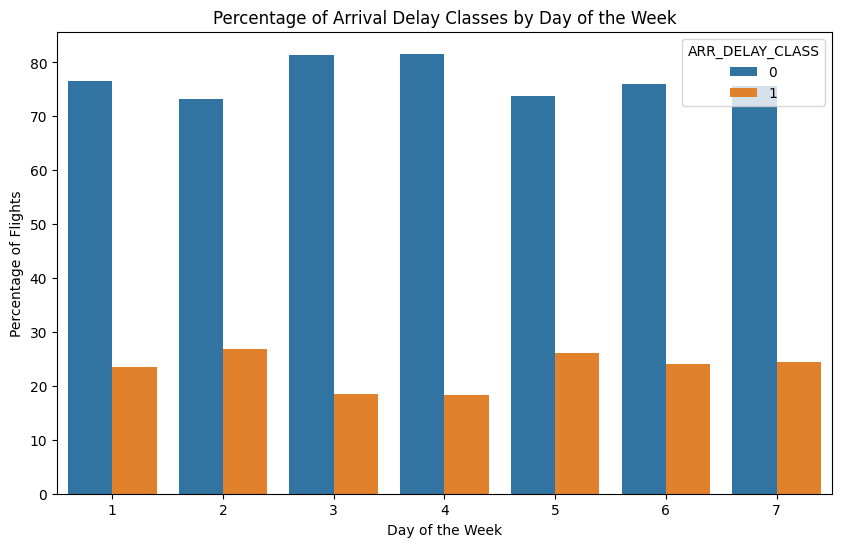

In [22]:
# Group by 'DAY_OF_WEEK' and 'ARR_DELAY_CLASS' to get counts
day_delay_counts = merged_df.groupby(['DAY_OF_WEEK', 'ARR_DELAY_CLASS']).size().reset_index(name='count')

# Calculate the total flights per day
total_flights_per_day = merged_df['DAY_OF_WEEK'].value_counts().reset_index()
total_flights_per_day.columns = ['DAY_OF_WEEK', 'total_flights']

# Merge the count data with total flights per day
day_delay_counts = day_delay_counts.merge(total_flights_per_day, on='DAY_OF_WEEK')

# Calculate the percentage of each delay class within each day of the week
day_delay_counts['percentage'] = (day_delay_counts['count'] / day_delay_counts['total_flights']) * 100

# Sort the data by 'DAY_OF_WEEK'
day_delay_counts_sorted = day_delay_counts.sort_values(by='DAY_OF_WEEK')

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=day_delay_counts_sorted, x='DAY_OF_WEEK', y='percentage', hue='ARR_DELAY_CLASS')

plt.title('Percentage of Arrival Delay Classes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage of Flights')
plt.show()


## Scheduled Arrival Time of Day vs Arrival Delay

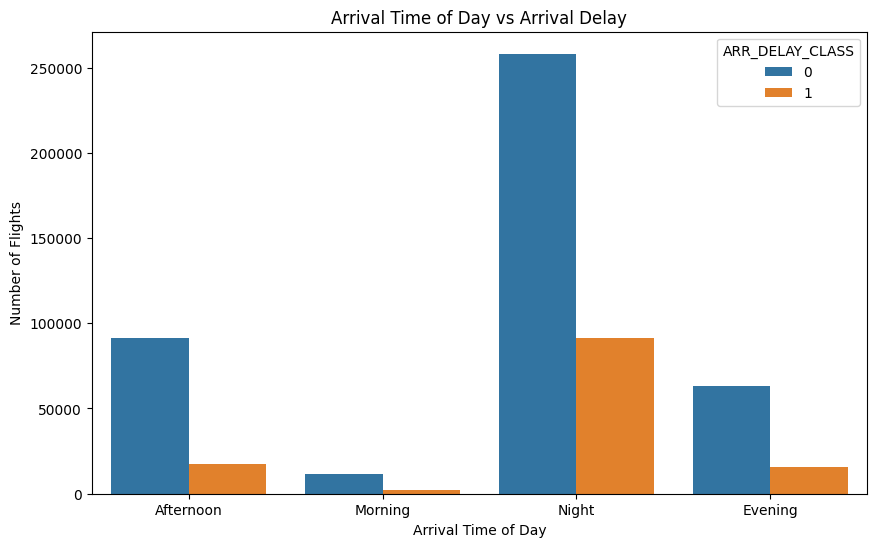

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data=merged_df, x='CRS_ARR_TIME_OF_DAY', hue='ARR_DELAY_CLASS')

plt.title('Arrival Time of Day vs Arrival Delay')
plt.xlabel('Arrival Time of Day')
plt.ylabel('Number of Flights')
plt.show()

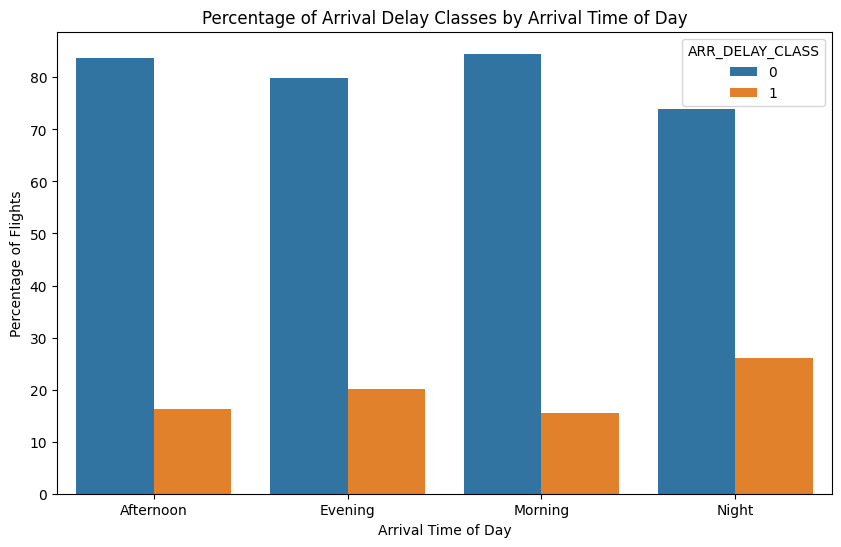

In [28]:
# Group by 'CRS_ARR_TIME_OF_DAY' and 'ARR_DELAY_CLASS' to get counts
time_delay_counts = merged_df.groupby(['CRS_ARR_TIME_OF_DAY', 'ARR_DELAY_CLASS']).size().reset_index(name='count')

# Calculate the total flights per time of day
total_flights_per_time = merged_df['CRS_ARR_TIME_OF_DAY'].value_counts().reset_index()
total_flights_per_time.columns = ['CRS_ARR_TIME_OF_DAY', 'total_flights']

# Merge the count data with total flights per time of day
time_delay_counts = time_delay_counts.merge(total_flights_per_time, on='CRS_ARR_TIME_OF_DAY')

# Calculate the percentage of each delay class within each time of day
time_delay_counts['percentage'] = (time_delay_counts['count'] / time_delay_counts['total_flights']) * 100

# Sort the data by 'CRS_ARR_TIME_OF_DAY'
time_delay_counts_sorted = time_delay_counts.sort_values(by='CRS_ARR_TIME_OF_DAY')

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=time_delay_counts_sorted, x='CRS_ARR_TIME_OF_DAY', y='percentage', hue='ARR_DELAY_CLASS')

plt.title('Percentage of Arrival Delay Classes by Arrival Time of Day')
plt.xlabel('Arrival Time of Day')
plt.ylabel('Percentage of Flights')
plt.show()


## Scheduled Departure Time of Day vs Arrival Delay

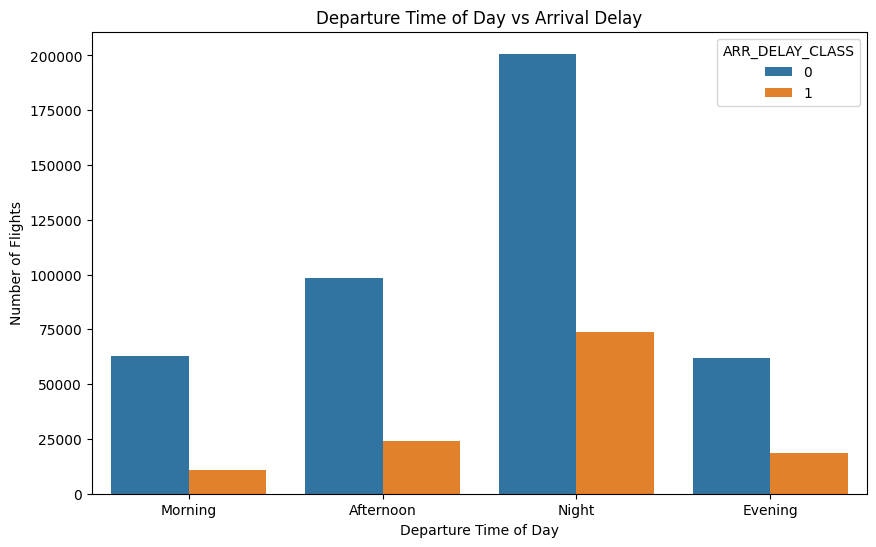

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(data=merged_df, x='CRS_DEP_TIME_OF_DAY', hue='ARR_DELAY_CLASS')

plt.title('Departure Time of Day vs Arrival Delay')
plt.xlabel('Departure Time of Day')
plt.ylabel('Number of Flights')
plt.show()

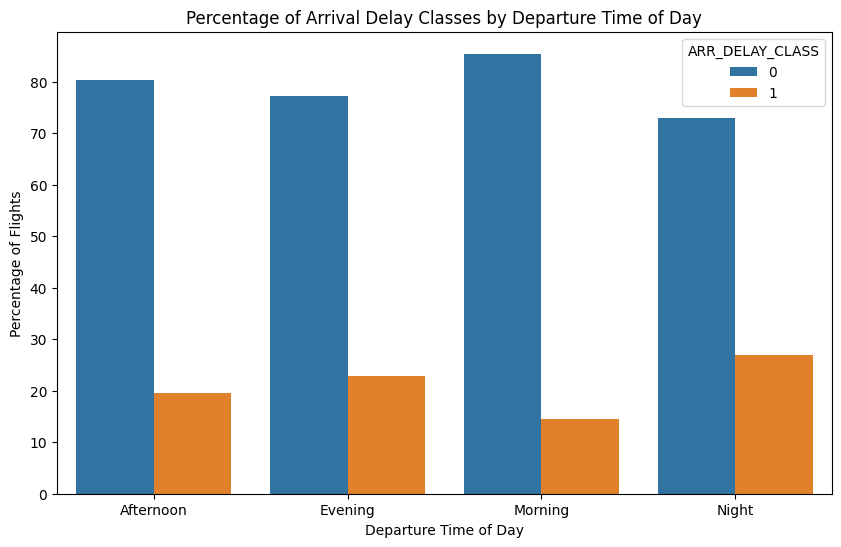

In [30]:
# Group by 'CRS_DEP_TIME_OF_DAY' and 'ARR_DELAY_CLASS' to get counts
dep_time_delay_counts = merged_df.groupby(['CRS_DEP_TIME_OF_DAY', 'ARR_DELAY_CLASS']).size().reset_index(name='count')

# Calculate the total flights per departure time of day
total_flights_per_dep_time = merged_df['CRS_DEP_TIME_OF_DAY'].value_counts().reset_index()
total_flights_per_dep_time.columns = ['CRS_DEP_TIME_OF_DAY', 'total_flights']

# Merge the count data with total flights per departure time
dep_time_delay_counts = dep_time_delay_counts.merge(total_flights_per_dep_time, on='CRS_DEP_TIME_OF_DAY')

# Calculate the percentage of each delay class within each departure time of day
dep_time_delay_counts['percentage'] = (dep_time_delay_counts['count'] / dep_time_delay_counts['total_flights']) * 100

# Sort the data by 'CRS_DEP_TIME_OF_DAY'
dep_time_delay_counts_sorted = dep_time_delay_counts.sort_values(by='CRS_DEP_TIME_OF_DAY')

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=dep_time_delay_counts_sorted, x='CRS_DEP_TIME_OF_DAY', y='percentage', hue='ARR_DELAY_CLASS')

plt.title('Percentage of Arrival Delay Classes by Departure Time of Day')
plt.xlabel('Departure Time of Day')
plt.ylabel('Percentage of Flights')
plt.show()

## Time of day most flights arrive

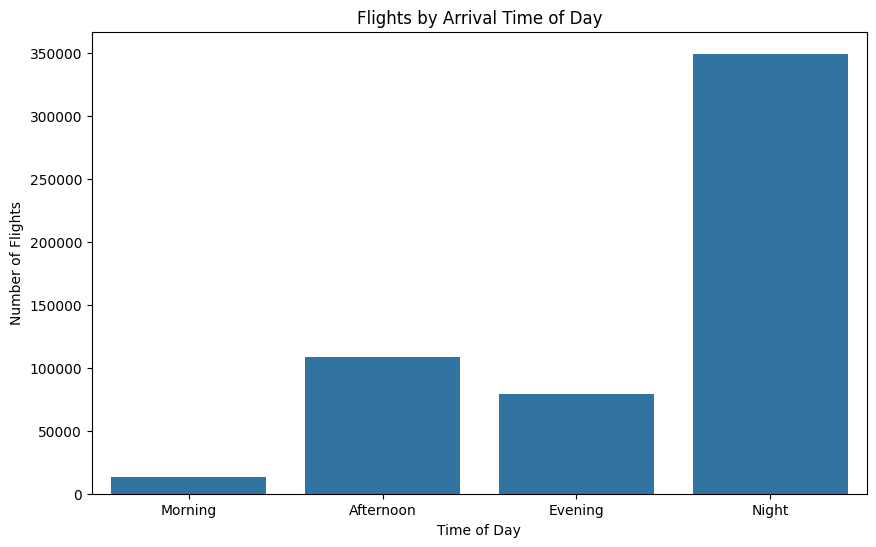

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(data=merged_df, x='CRS_ARR_TIME_OF_DAY', order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Flights by Arrival Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Flights')
plt.show()

## Mkt Unique Carrier Performance

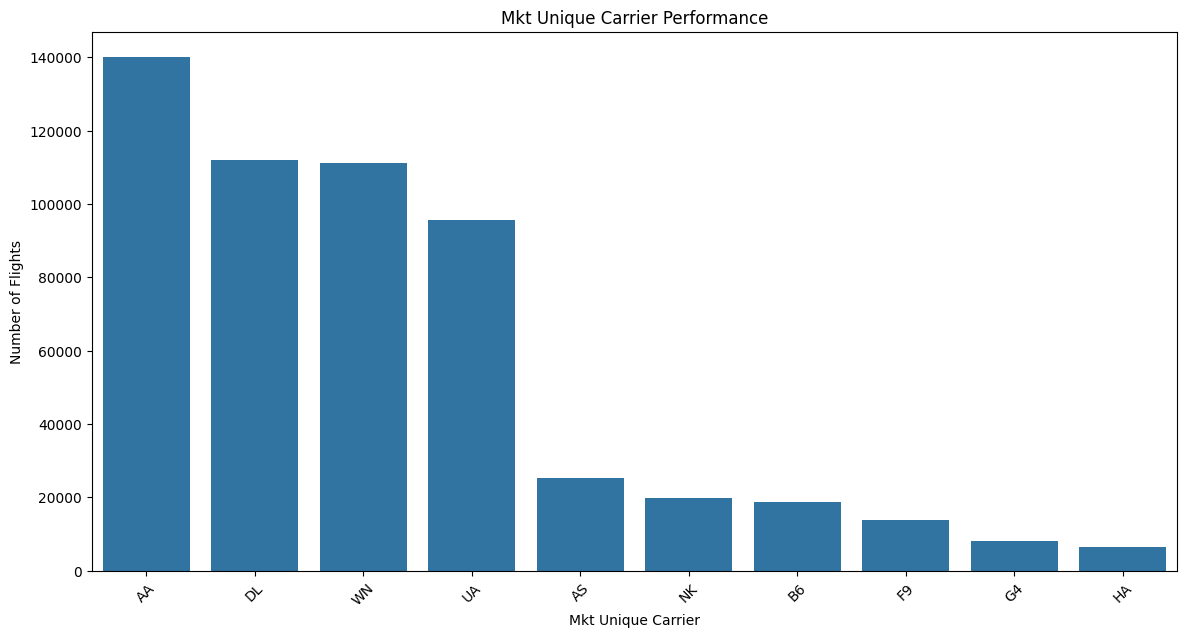

In [32]:
plt.figure(figsize=(14,7))
sns.countplot(data=merged_df, x='MKT_UNIQUE_CARRIER', order=merged_df['MKT_UNIQUE_CARRIER'].value_counts().index)

plt.title('Mkt Unique Carrier Performance')
plt.xlabel('Mkt Unique Carrier')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

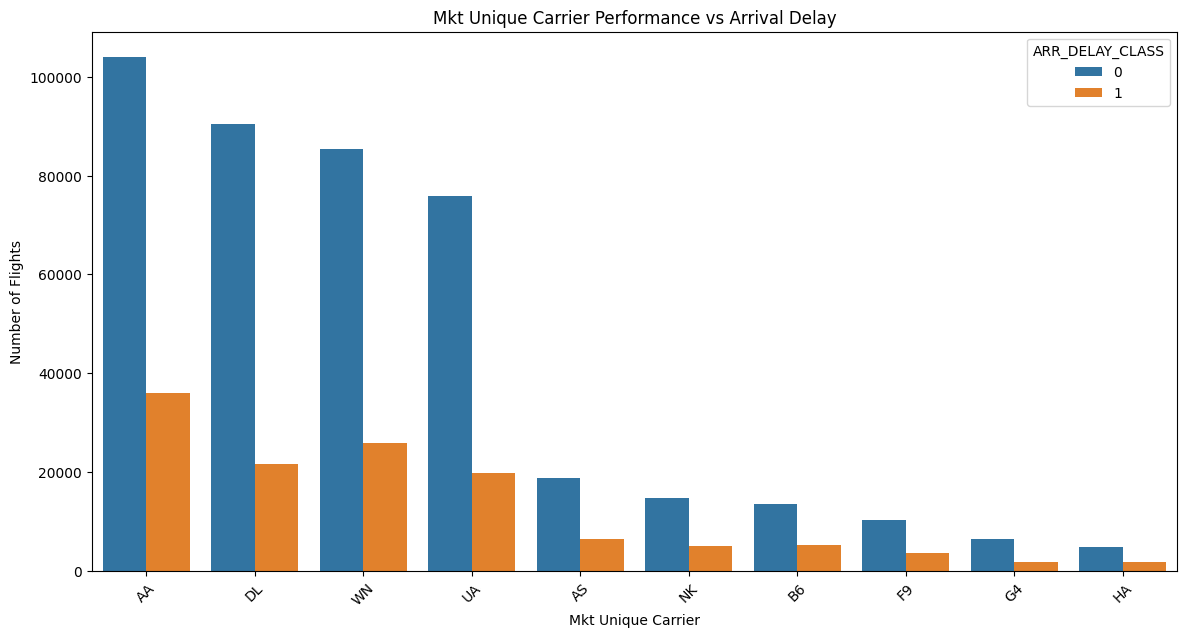

In [33]:
plt.figure(figsize=(14,7))
sns.countplot(data=merged_df, x='MKT_UNIQUE_CARRIER', hue='ARR_DELAY_CLASS', order=merged_df['MKT_UNIQUE_CARRIER'].value_counts().index)

plt.title('Mkt Unique Carrier Performance vs Arrival Delay')
plt.xlabel('Mkt Unique Carrier')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

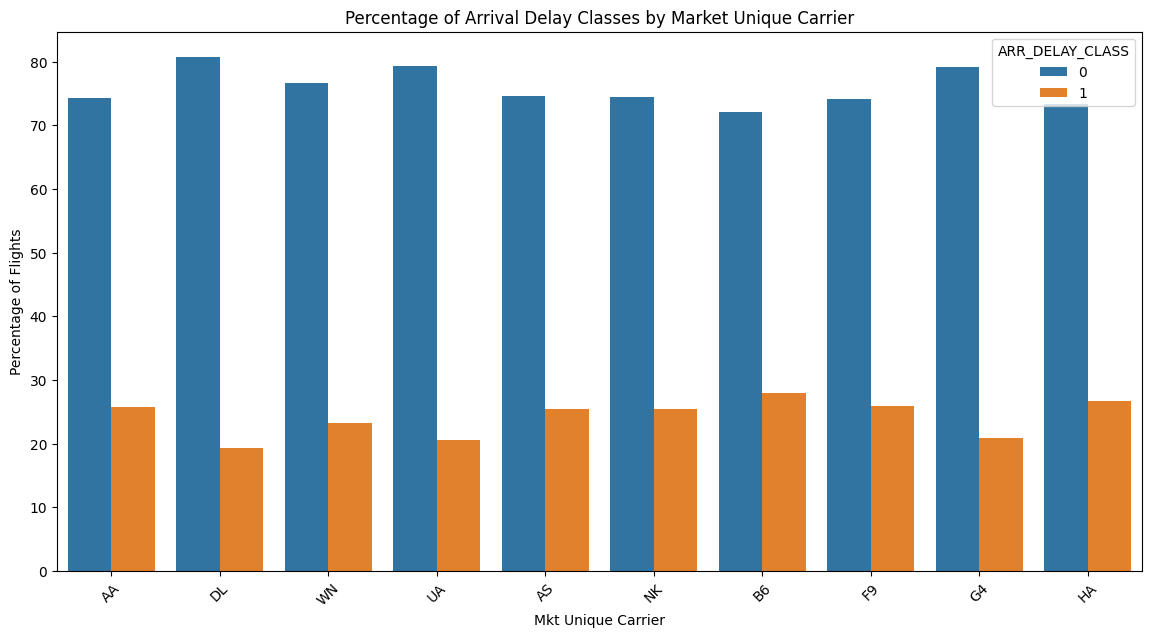

In [34]:
# Group by 'MKT_UNIQUE_CARRIER' and 'ARR_DELAY_CLASS' to get counts
carrier_delay_counts = merged_df.groupby(['MKT_UNIQUE_CARRIER', 'ARR_DELAY_CLASS']).size().reset_index(name='count')

# Calculate the total flights per carrier
total_flights_per_carrier = merged_df['MKT_UNIQUE_CARRIER'].value_counts().reset_index()
total_flights_per_carrier.columns = ['MKT_UNIQUE_CARRIER', 'total_flights']

# Merge the count data with total flights per carrier
carrier_delay_counts = carrier_delay_counts.merge(total_flights_per_carrier, on='MKT_UNIQUE_CARRIER')

# Calculate the percentage of each delay class within each carrier
carrier_delay_counts['percentage'] = (carrier_delay_counts['count'] / carrier_delay_counts['total_flights']) * 100

# Sort the data by 'MKT_UNIQUE_CARRIER' in the same order as the counts
carrier_delay_counts_sorted = carrier_delay_counts.sort_values(by=['total_flights', 'MKT_UNIQUE_CARRIER'], ascending=[False, True])

# Plot the results
plt.figure(figsize=(14, 7))
sns.barplot(data=carrier_delay_counts_sorted, x='MKT_UNIQUE_CARRIER', y='percentage', hue='ARR_DELAY_CLASS',
            order=carrier_delay_counts_sorted['MKT_UNIQUE_CARRIER'].unique())

plt.title('Percentage of Arrival Delay Classes by Market Unique Carrier')
plt.xlabel('Mkt Unique Carrier')
plt.ylabel('Percentage of Flights')
plt.xticks(rotation=45)
plt.show()


## Carrier Number Performance

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


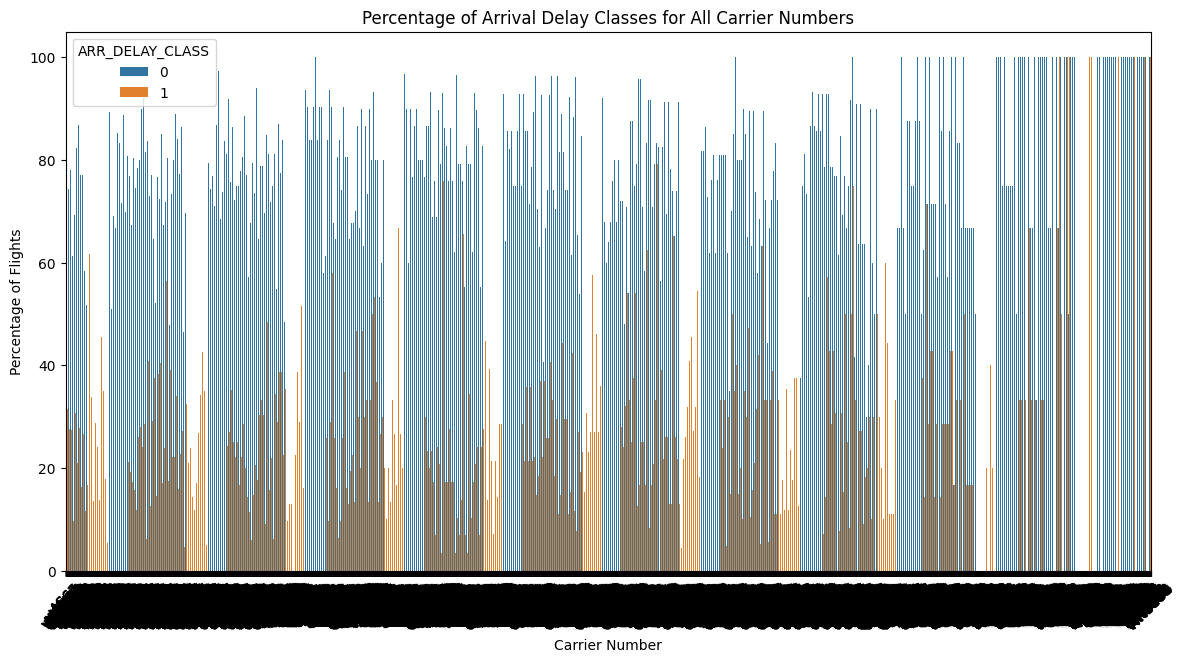

In [35]:
# Group by 'CARRIER_NUM' and 'ARR_DELAY_CLASS' to get counts for all carriers
carrier_num_delay_counts = merged_df.groupby(['CARRIER_NUM', 'ARR_DELAY_CLASS']).size().reset_index(name='count')

# Calculate the total flights per carrier
total_flights_per_carrier_num = merged_df['CARRIER_NUM'].value_counts().reset_index()
total_flights_per_carrier_num.columns = ['CARRIER_NUM', 'total_flights']

# Merge the count data with total flights data
carrier_num_delay_counts = carrier_num_delay_counts.merge(total_flights_per_carrier_num, on='CARRIER_NUM')

# Calculate the percentage of each delay class within each carrier
carrier_num_delay_counts['percentage'] = (carrier_num_delay_counts['count'] / carrier_num_delay_counts['total_flights']) * 100

# Sort the data by 'total_flights' in descending order, and within that by 'ARR_DELAY_CLASS'
carrier_num_delay_counts_sorted = carrier_num_delay_counts.sort_values(by=['total_flights', 'CARRIER_NUM'], ascending=[False, True])

# Plot the results for all carriers
plt.figure(figsize=(14, 7))
sns.barplot(data=carrier_num_delay_counts_sorted, x='CARRIER_NUM', y='percentage', hue='ARR_DELAY_CLASS',
            order=carrier_num_delay_counts_sorted['CARRIER_NUM'].unique())

plt.title('Percentage of Arrival Delay Classes for All Carrier Numbers')
plt.xlabel('Carrier Number')
plt.ylabel('Percentage of Flights')
plt.xticks(rotation=45)
plt.show()

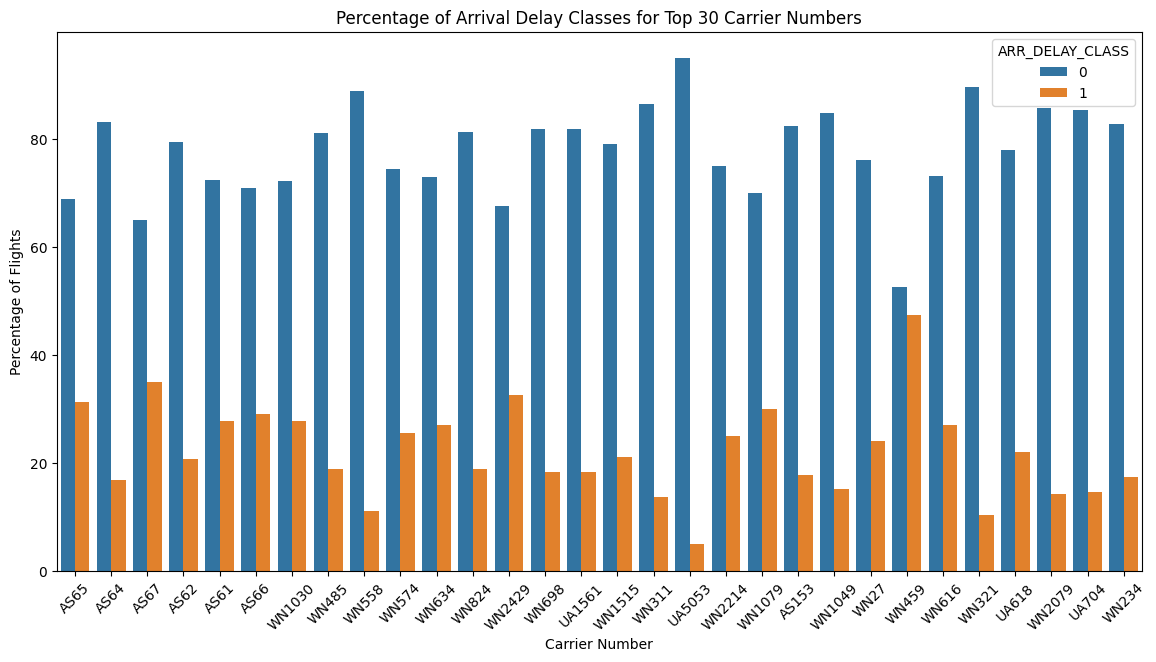

In [37]:
# Get the top 30 carriers by flight count
top_30_carriers = merged_df['CARRIER_NUM'].value_counts().nlargest(30).index

# Filter the dataframe to include only the top 20 carriers
top_30_df = merged_df[merged_df['CARRIER_NUM'].isin(top_30_carriers)]

# Group by 'CARRIER_NUM' and 'ARR_DELAY_CLASS' to get counts
carrier_delay_counts = top_30_df.groupby(['CARRIER_NUM', 'ARR_DELAY_CLASS']).size().reset_index(name='count')

# Calculate the total flights per carrier
total_flights_per_carrier = top_30_df['CARRIER_NUM'].value_counts().reset_index()
total_flights_per_carrier.columns = ['CARRIER_NUM', 'total_flights']

# Merge the count data with total flights data
carrier_delay_counts = carrier_delay_counts.merge(total_flights_per_carrier, on='CARRIER_NUM')

# Calculate the percentage of each delay class within each carrier
carrier_delay_counts['percentage'] = (carrier_delay_counts['count'] / carrier_delay_counts['total_flights']) * 100

# Sort the data by 'CARRIER_NUM' in descending order of total flights
carrier_delay_counts_sorted = carrier_delay_counts.sort_values(by=['total_flights', 'ARR_DELAY_CLASS'], ascending=[False, True])

# Plot the results
plt.figure(figsize=(14, 7))
sns.barplot(data=carrier_delay_counts_sorted, x='CARRIER_NUM', y='percentage', hue='ARR_DELAY_CLASS', order=top_30_carriers)

plt.title('Percentage of Arrival Delay Classes for Top 30 Carrier Numbers')
plt.xlabel('Carrier Number')
plt.ylabel('Percentage of Flights')
plt.xticks(rotation=45)
plt.show()


## Flight Distance

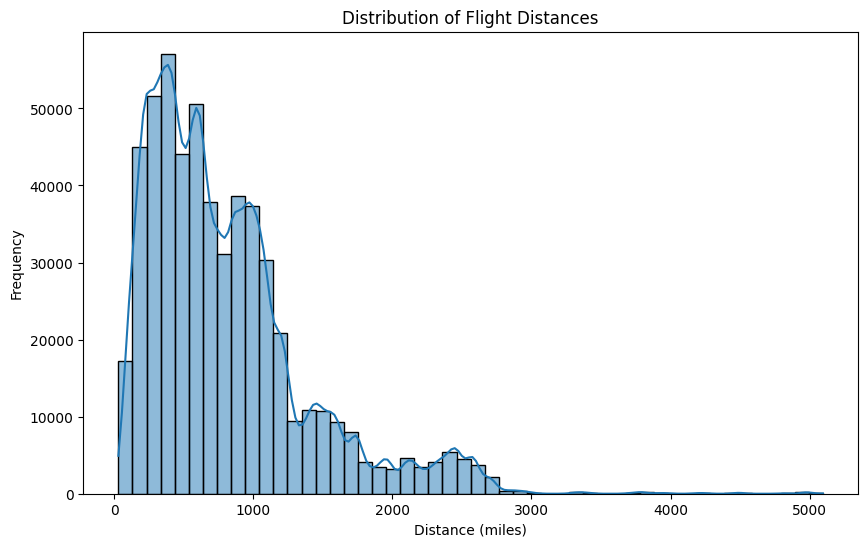

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(merged_df['DISTANCE'], bins=50, kde=True)
plt.title('Distribution of Flight Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


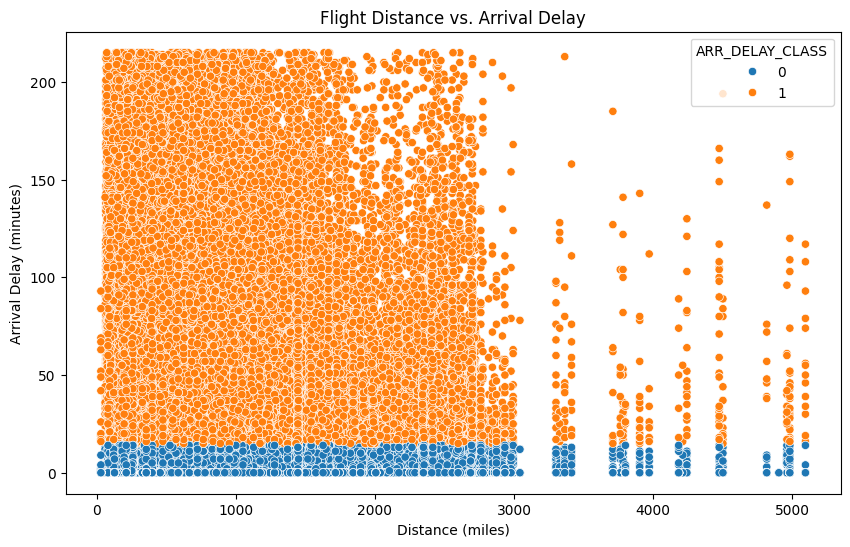

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='DISTANCE', y='ARR_DELAY_NEW', hue='ARR_DELAY_CLASS', data=merged_df)
plt.title('Flight Distance vs. Arrival Delay')
plt.xlabel('Distance (miles)')
plt.ylabel('Arrival Delay (minutes)')
plt.show()

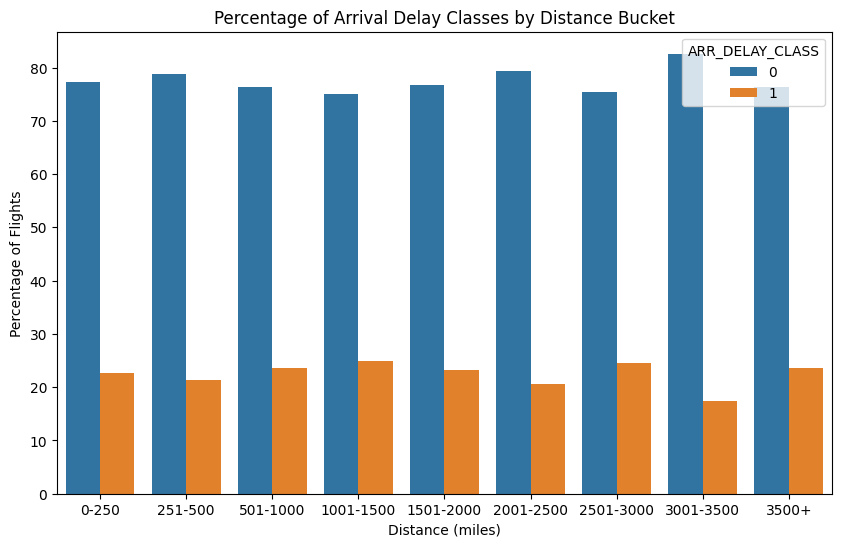

In [43]:
# Define distance buckets
bins = [0, 250, 500, 1000, 1500, 2000, 2500, 3000, 3500, merged_df['DISTANCE'].max()]
labels = ['0-250', '251-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000', '3001-3500', '3500+']

# Create a new column for distance buckets
merged_df['DISTANCE_BUCKET'] = pd.cut(merged_df['DISTANCE'], bins=bins, labels=labels)

# Group by 'DISTANCE_BUCKET' and 'ARR_DELAY_CLASS' to get counts
distance_delay_counts = merged_df.groupby(['DISTANCE_BUCKET', 'ARR_DELAY_CLASS'],  observed=True).size().reset_index(name='count')

# Calculate the total number of flights per distance bucket
total_flights_per_bucket = merged_df['DISTANCE_BUCKET'].value_counts().reset_index()
total_flights_per_bucket.columns = ['DISTANCE_BUCKET', 'total_flights']

# Merge the count data with total flights per distance bucket
distance_delay_counts = distance_delay_counts.merge(total_flights_per_bucket, on='DISTANCE_BUCKET')

# Calculate the percentage of each delay class within each distance bucket
distance_delay_counts['percentage'] = (distance_delay_counts['count'] / distance_delay_counts['total_flights']) * 100

# Sort the data by 'DISTANCE_BUCKET'
distance_delay_counts_sorted = distance_delay_counts.sort_values(by='DISTANCE_BUCKET')

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=distance_delay_counts_sorted, x='DISTANCE_BUCKET', y='percentage', hue='ARR_DELAY_CLASS')

plt.title('Percentage of Arrival Delay Classes by Distance Bucket')
plt.xlabel('Distance (miles)')
plt.ylabel('Percentage of Flights')
plt.show()


## Correlation between Scheduled Elapsed Time and Distance

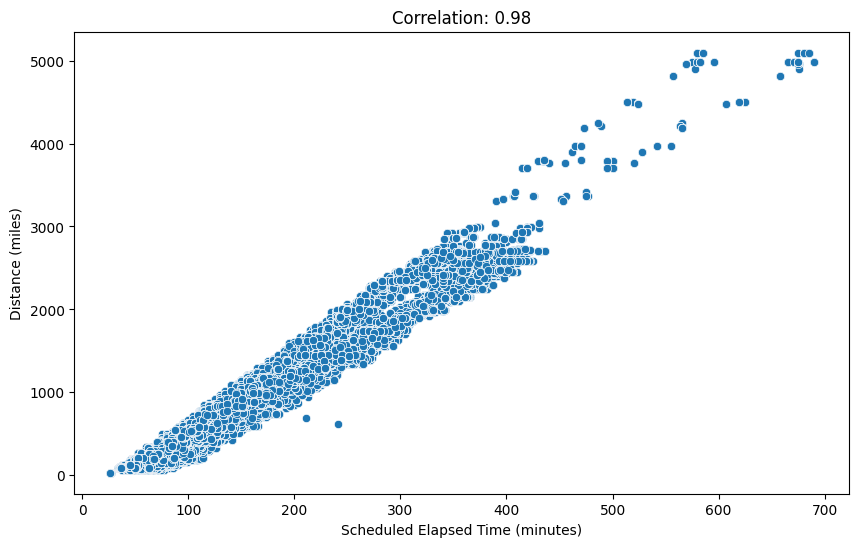

Correlation between CRS_ELAPSED_TIME and DISTANCE: 0.9767242373155849


In [44]:
correlation = merged_df['CRS_ELAPSED_TIME'].corr(merged_df['DISTANCE'])

plt.figure(figsize=(10,6))
sns.scatterplot(x='CRS_ELAPSED_TIME', y='DISTANCE', data=merged_df)
plt.title(f'Correlation: {correlation:.2f}')
plt.xlabel('Scheduled Elapsed Time (minutes)')
plt.ylabel('Distance (miles)')
plt.show()

print(f"Correlation between CRS_ELAPSED_TIME and DISTANCE: {correlation}")

## Number of Flights for each Delay Cause

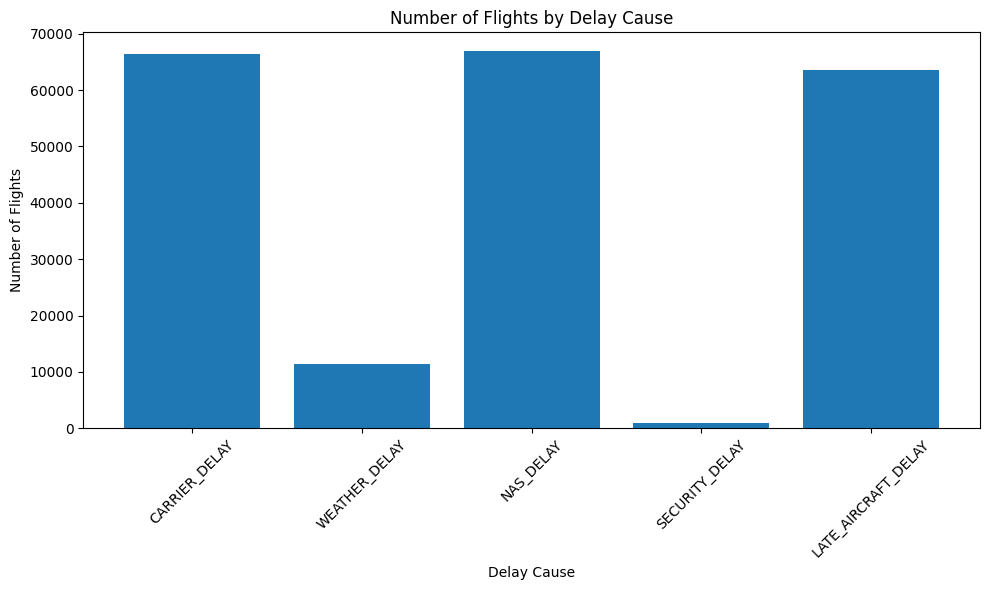

In [45]:
# Creating a dictionary to store the number of flights with each type of delay
delay_causes = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
delay_counts = {cause: (merged_df[cause] > 0).sum() for cause in delay_causes}

plt.figure(figsize=(10, 6))
plt.bar(delay_counts.keys(), delay_counts.values())
plt.title('Number of Flights by Delay Cause')
plt.xlabel('Delay Cause')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

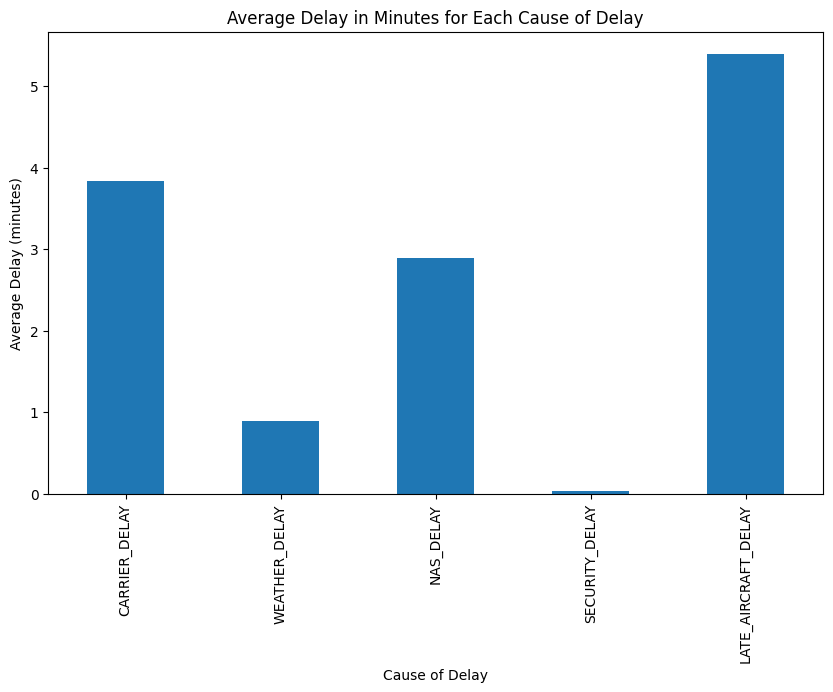

In [46]:
delay_causes = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
average_delays = merged_df[delay_causes].mean()

plt.figure(figsize=(10,6))
average_delays.plot(kind='bar')
plt.title('Average Delay in Minutes for Each Cause of Delay')
plt.xlabel('Cause of Delay')
plt.ylabel('Average Delay (minutes)')
plt.show()

## Weather (Temperature & Humidity) vs Arrival Delay

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


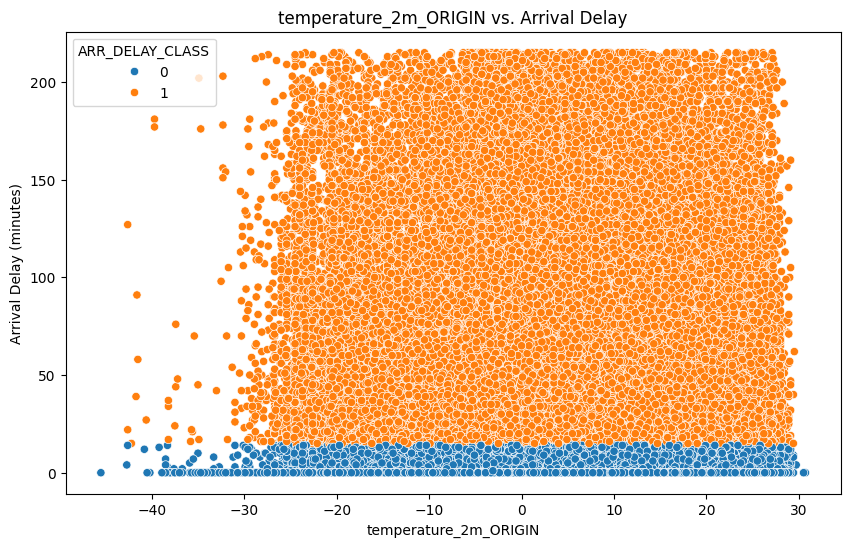

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='temperature_2m_ORIGIN', y='ARR_DELAY_NEW', hue='ARR_DELAY_CLASS', data=merged_df)
plt.title('temperature_2m_ORIGIN vs. Arrival Delay')
plt.xlabel('temperature_2m_ORIGIN')
plt.ylabel('Arrival Delay (minutes)')
plt.show()

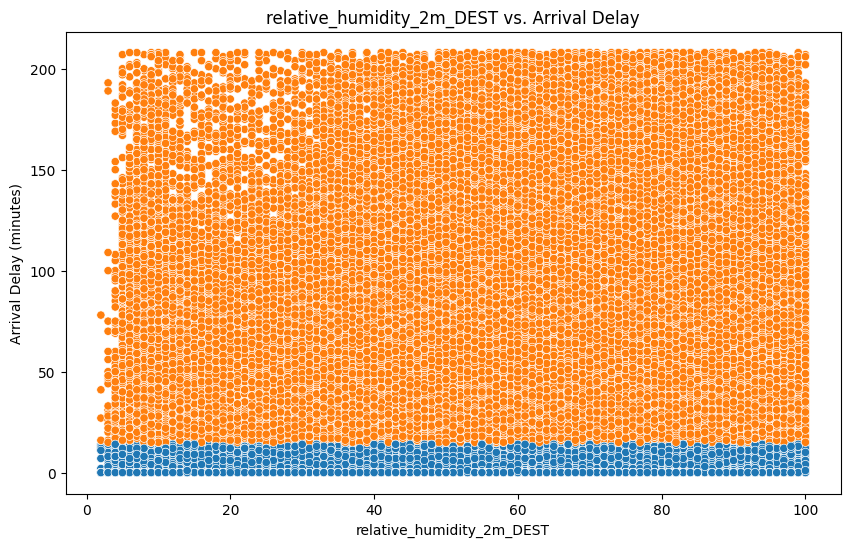

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='relative_humidity_2m_DEST', y='ARR_DELAY_NEW', hue='ARR_DELAY_CLASS', data=merged_df, legend=False)
plt.title('relative_humidity_2m_DEST vs. Arrival Delay')
plt.xlabel('relative_humidity_2m_DEST')
plt.ylabel('Arrival Delay (minutes)')
plt.show()

<ipython-input-51-8b1ebb6b33b1>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  humidity_delay_counts = merged_df.groupby(['HUMIDITY_BUCKET', 'ARR_DELAY_CLASS']).size().reset_index(name='count')


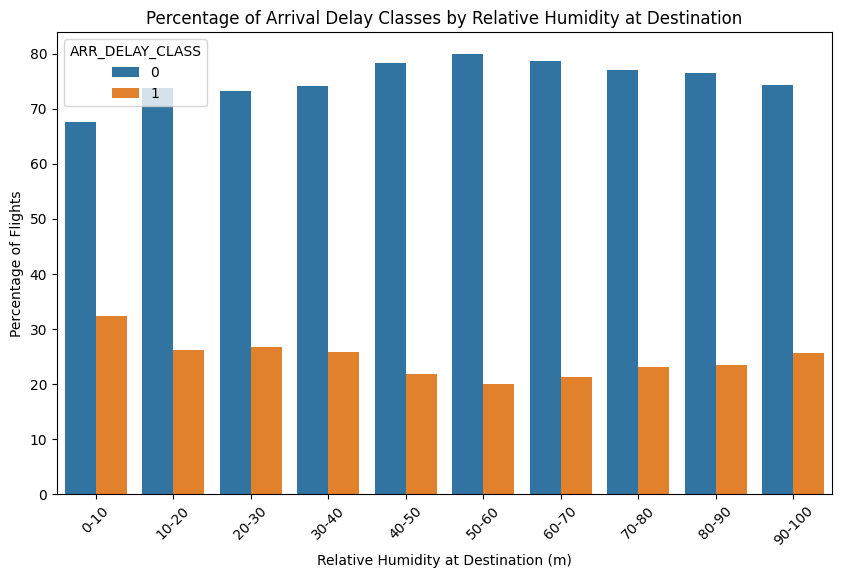

In [51]:
# Define humidity buckets
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create a new column for humidity buckets
merged_df['HUMIDITY_BUCKET'] = pd.cut(merged_df['relative_humidity_2m_DEST'], bins=bins, labels=labels)

# Group by 'HUMIDITY_BUCKET' and 'ARR_DELAY_CLASS' to get counts
humidity_delay_counts = merged_df.groupby(['HUMIDITY_BUCKET', 'ARR_DELAY_CLASS']).size().reset_index(name='count')

# Calculate the total flights per humidity bucket
total_flights_per_humidity = merged_df['HUMIDITY_BUCKET'].value_counts().reset_index()
total_flights_per_humidity.columns = ['HUMIDITY_BUCKET', 'total_flights']

# Merge the count data with total flights per humidity bucket
humidity_delay_counts = humidity_delay_counts.merge(total_flights_per_humidity, on='HUMIDITY_BUCKET')

# Calculate the percentage of each delay class within each humidity bucket
humidity_delay_counts['percentage'] = (humidity_delay_counts['count'] / humidity_delay_counts['total_flights']) * 100

# Sort the data by 'HUMIDITY_BUCKET'
humidity_delay_counts_sorted = humidity_delay_counts.sort_values(by='HUMIDITY_BUCKET')

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=humidity_delay_counts_sorted, x='HUMIDITY_BUCKET', y='percentage', hue='ARR_DELAY_CLASS')

plt.title('Percentage of Arrival Delay Classes by Relative Humidity at Destination')
plt.xlabel('Relative Humidity at Destination (m)')
plt.ylabel('Percentage of Flights')
plt.xticks(rotation=45)
plt.show()


# Correlation Matrix for Merged Data

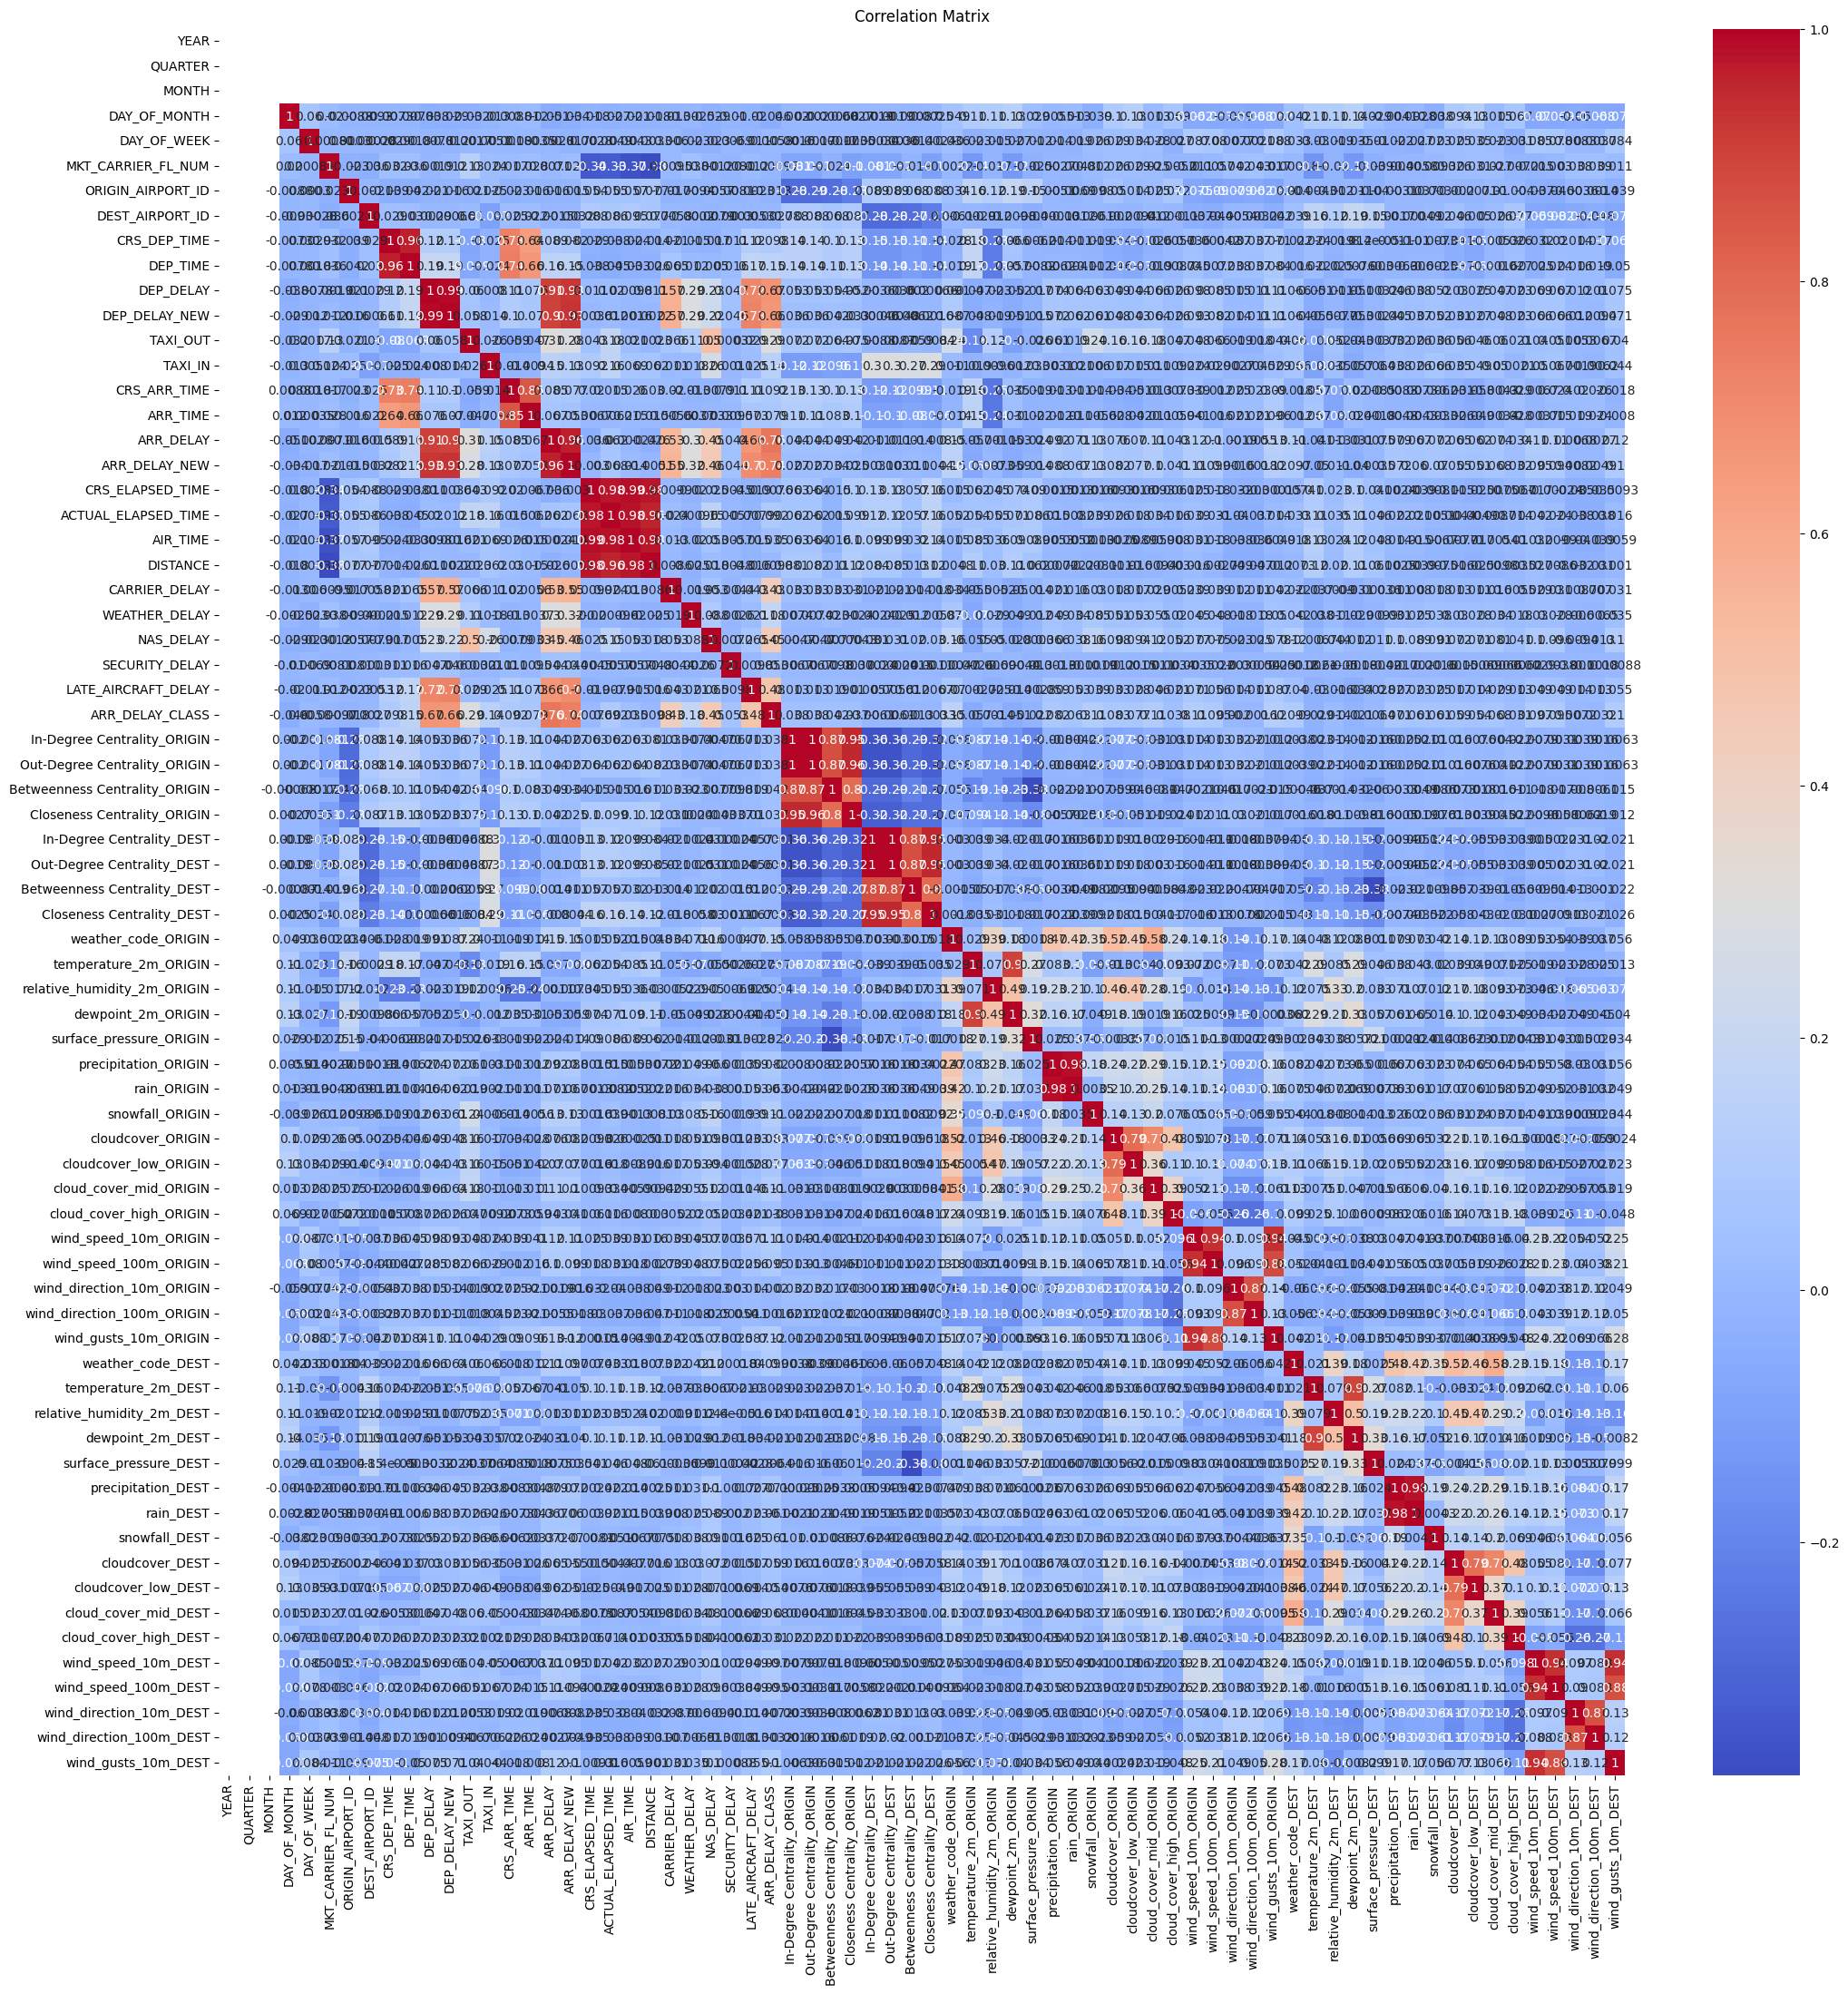

In [52]:
plt.figure(figsize=(25,25))
numerical_df = merged_df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Saving Merged Data to CSV

In [ ]:
merged_df.to_csv('merged_data.csv', index=False)

In [53]:
# # Take a random 10% sample of the data
merged_df_10 = merged_df.sample(frac=0.1, random_state=1)

# # Save the sampled data to a new CSV file
merged_df_10 .to_csv('merged_df_10 .csv', index=False)